# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/sehaj/Desktop/Starter_Code 4/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/sehaj/Desktop/Starter_Code 4/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_data = pd.merge(mouse_metadata, study_results, how="right")

# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = len(Combined_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number
duplicates = Combined_data[Combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]

#find the specific ID number for the duplicated data
duplicate_mice_ID = duplicates.iloc[0,0]
duplicate_mice_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_complete = Combined_data[Combined_data['Mouse ID'] != duplicate_mice_ID]

Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(clean_data_complete["Mouse ID"].unique())
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
median = clean_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
var = clean_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
stddev = clean_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
sem = clean_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stddev, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

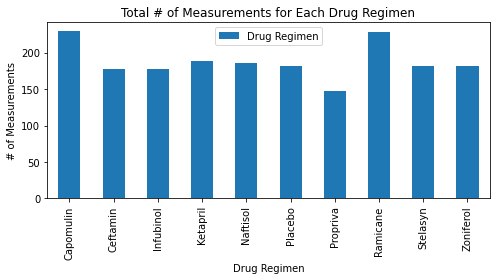

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grouped_drug = clean_data_complete.groupby("Drug Regimen")
drug_count = pd.DataFrame(grouped_drug["Drug Regimen"].count())
drug_bar = drug_count.plot(kind='bar', figsize=(7,4))
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
plt.tight_layout()
plt.show()

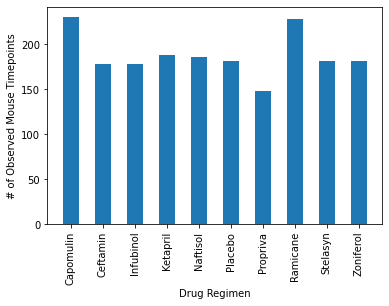

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_type = clean_data_complete.groupby("Drug Regimen")

#count how many observed timepoints per drug
count_drug_type = drug_type["Drug Regimen"].count()

#convert series to dataframe 
plot_df = count_drug_type.to_frame()

# use index values as the x-axis
drug_list = list(plot_df.index.values)

# use dataframe to extract mouse timepoints
counts_mices = plot_df.iloc[:,0]

#plot
plt.bar(drug_list,counts_mices, width = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

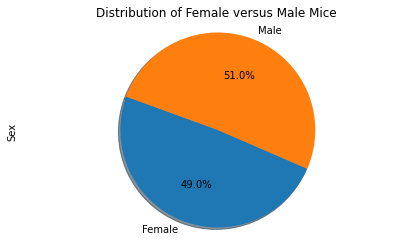

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_type = clean_data_complete.groupby('Sex')
# gender_count = pd.DataFrame(gender_group['Mouse ID'].nunique())
gender_count = pd.DataFrame(sex_type['Sex'].count())
# gender_count.head()

gender_count.plot(kind='pie', figsize=(7,4), y='Sex', title="Distribution of Female versus Male Mice", 
                startangle=160, autopct='%1.1f%%', shadow=True, legend=False)

plt.axis('equal')
plt.show()

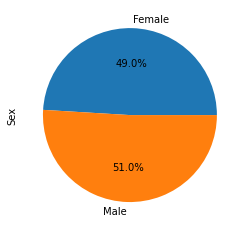

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_type = clean_data_complete.groupby("Sex")

#count how many observed mice timepoints per sex
count_sex_type = sex_type["Sex"].count()

#convert series to dataframe 
pyplot_df = count_sex_type.to_frame()

# use index values as the labels
sex_list = list(pyplot_df.index.values)
counts_sex = pyplot_df.iloc[:,0]

#plot
plt.pie(counts_sex, labels=sex_list, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data_complete.loc[clean_data_complete.groupby('Mouse ID')['Timepoint'].idxmax()]

# Drop unnecessary columns. This dataframe contains the data for the max timepoint for each mouse ID and the corresponding Drug and Tumor Volume data.
greatest_timepoint = greatest_timepoint.drop(columns=['Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'])
greatest_timepoint.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
1804,a203,Infubinol,45,67.973419
1786,a251,Infubinol,45,65.525743
1783,a262,Placebo,45,70.717621
1856,a275,Ceftamin,45,62.999356
1401,a366,Stelasyn,30,63.440686


In [14]:
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_vol =[]
ramicane_vol =[]
infubinol_vol=[]
ceftamin_vol=[]

#loop through our dataframe and extract the tumor volumes and append them to the correct corresponding list
for ind in greatest_timepoint.index:
    if greatest_timepoint['Drug Regimen'][ind] == 'Capomulin':
        capomulin_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
    elif greatest_timepoint['Drug Regimen'][ind] == 'Ramicane':
        ramicane_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
    elif greatest_timepoint['Drug Regimen'][ind] == 'Infubinol':
        infubinol_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])
    elif greatest_timepoint['Drug Regimen'][ind] == 'Ceftamin':
        ceftamin_vol.append(greatest_timepoint['Tumor Volume (mm3)'][ind])

In [15]:
# create a function that takes the tumor volume and treatment lists and outputs the IQR and whether or not the data has an outlier
def outlier(tumor, medicine):
    iqr = st.iqr(tumor)
    print("The IQR for " + str(medicine) + " is " + str(iqr))
    lower_bound = np.percentile(tumor, [25]) - 1.5*iqr
    upper_bound = np.percentile(tumor, [75]) + 1.5*iqr
    outlier = False
    for x in tumor:
        if x > upper_bound or x < lower_bound:
            print("The outlier for " + str(medicine) + " is " + str(x))
            outlier = True
    if outlier == False:
        print(str(medicine) + " does not have an outlier")


In [16]:
# run the outlier function
outlier(capomulin_vol, treatments[0])
outlier(ramicane_vol, treatments[1])
outlier(infubinol_vol, treatments[2])
outlier(ceftamin_vol, treatments[3])

The IQR for Capomulin is 7.781863460000004
Capomulin does not have an outlier
The IQR for Ramicane is 9.098536719999998
Ramicane does not have an outlier
The IQR for Infubinol is 11.477135160000003
The outlier for Infubinol is 36.3213458
The IQR for Ceftamin is 15.577752179999997
Ceftamin does not have an outlier


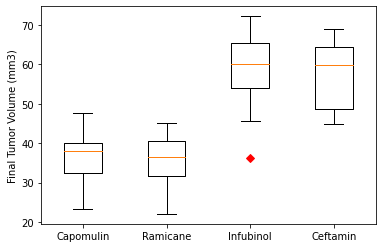

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_dict = {treatments[0]:capomulin_vol, treatments[1]:ramicane_vol, treatments[2]: infubinol_vol, treatments[3]: ceftamin_vol}

# create a figure that displays a boxplot for each drug - label the outlier with a bright color
fig, ax = plt.subplots()
ax.boxplot(drug_dict.values(), 0, 'rD')
ax.set_xticklabels(drug_dict.keys())
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

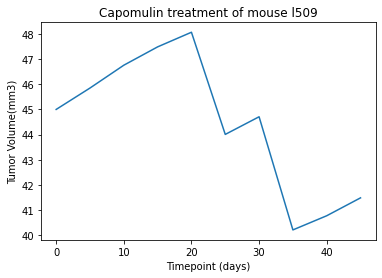

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# get data for single mouse
mouseID = 'l509'
single_mouse = clean_data_complete[clean_data_complete['Mouse ID'] == mouseID]

# extract the timepoint and volume data
x_values = single_mouse['Timepoint']
y_values = single_mouse['Tumor Volume (mm3)']

#plot
plt.plot(x_values, y_values)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

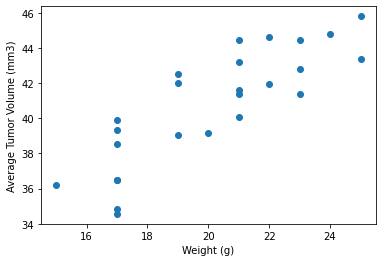

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
DrugID = 'Capomulin'
# include only data for the drug in question
single_drug = clean_data_complete[clean_data_complete['Drug Regimen'] == DrugID]
# group by Mouse ID and take the mean of each
mouse_group = single_drug.groupby(["Mouse ID"]).mean(numeric_only=True)

# select only volume and weight
avg_tumor = mouse_group["Tumor Volume (mm3)"]
avg_weight = mouse_group["Weight (g)"] 

#plot
plt.scatter(avg_weight, avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight, avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [21]:
# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(avg_weight, avg_tumor)
# find range of where we can calculate the regression based on the max and min of the weight
min_x = avg_weight.min()
max_x = avg_weight.max()
regres_values = np.linspace(min_x,max_x,100)
# Create equation of line to calculate predicted tumor volume
pe_fit = pe_slope * regres_values + pe_int

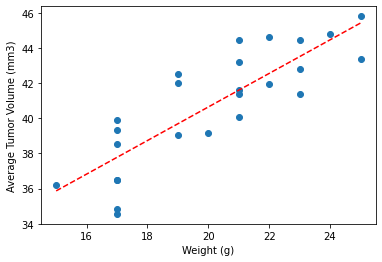

In [22]:
# plot results
plt.scatter(avg_weight, avg_tumor)
plt.plot(regres_values, pe_fit, "--", color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()